In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams

In [126]:
df = pd.read_csv('data/datagov/corona_tested_individuals_ver_0069.csv')
df.test_date = pd.to_datetime(df.test_date)
df_positive = df.query("corona_result == 'חיובי'")
df = df.sort_values(by='test_date').reset_index(drop=True)

C:\Users\eliav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-03-11,0,0,0,0,0,שלילי,NaN,נקבה,Other
1,2020-03-11,1,1,1,0,0,שלילי,NaN,נקבה,Other
2,2020-03-11,0,0,0,0,0,שלילי,NaN,נקבה,Other
3,2020-03-11,0,0,0,0,0,שלילי,NaN,נקבה,Other
4,2020-03-11,0,0,0,0,0,שלילי,NaN,נקבה,Other


In [167]:
df.loc[df.test_date=='2020-05-02']

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,month
295108,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
295109,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
295110,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
295111,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
295112,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
...,...,...,...,...,...,...,...,...,...,...,...
297532,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
297533,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
297534,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5
297535,2020-05-02,0,0,0,0,0,שלילי,NaN,NaN,Other,5


In [166]:
df['month'] = df.test_date.dt.month
df.loc[(df.month==5) & (df.corona_result=='חיובי'),['test_date','gender']].drop_duplicates()

,test_date,gender
289379,2020-05-01,נקבה
289451,2020-05-01,זכר
290171,2020-05-01,NaN
295120,2020-05-02,NaN
298701,2020-05-03,זכר
298834,2020-05-03,נקבה
303616,2020-05-04,NaN
309180,2020-05-05,זכר
309249,2020-05-05,נקבה
315591,2020-05-06,נקבה


#### Number of Tests/Positive and % Positive

In [128]:
df_test_num = df.groupby('test_date')['corona_result'].count()
df_positive_num = df_positive.groupby('test_date')['corona_result'].count()
pct_positive = df_test_positive/df_test_num * 100


#### male/female positive

In [129]:
positive_num_mf = df_positive.groupby(['test_date','gender'])[['corona_result']].count().rename(columns={'corona_result':'num'})
positive_num_mf_pct = positive_num_mf.groupby(level=0).apply(lambda x: x / x.sum() *100).rename(columns={'num':'pct'})

In [130]:
df_mf = positive_num_mf.merge(positive_num_mf_pct, right_index=True,left_index=True).reset_index(level=1)


### GRAPHS

In [132]:
## mpl rcParams

rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 16
rcParams['axes.labelweight'] = 'bold'
rcParams['font.family'] = 'Lato'
rcParams['font.size'] = 15
rcParams["axes.grid"] = False
rcParams["axes.grid.axis"] ="y"
rcParams['axes.axisbelow'] = True
rcParams['axes.titleweight'] = 'bold'

In [133]:
rcParams['xtick.minor.visible'] 

False

[]

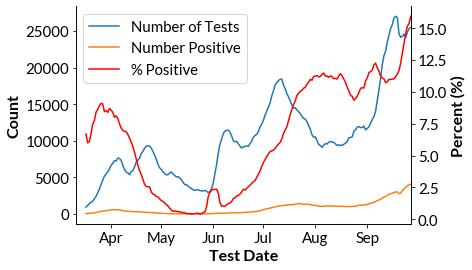

In [134]:
ax = df_test_num.rolling(7).mean().plot(label='Number of Tests')
ax = df_test_positive.rolling(7).mean().plot(label='Number Positive')
axt = ax.twinx()
axt.plot(pct_positive.rolling(7).mean(), color='red', label='% Positive')

han,_ = ax.get_legend_handles_labels()
han2,_ = axt.get_legend_handles_labels()
ax.legend(handles=han+han2)

months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.set_xlabel('Test Date')
ax.set_ylabel('Count')
axt.set_ylabel('Percent (%)')
ax.set_xticks([], minor=True)

Text(0, 0.5, 'Count (Positive Test)')

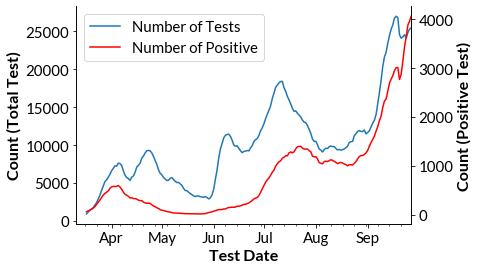

In [135]:
ax = df_test_num.rolling(7).mean().plot(label='Number of Tests')
axt = ax.twinx()
# ax = df_test_positive.rolling(7).mean().plot(label='Number Positive')
axt.plot(df_test_positive.rolling(7).mean(), color='red', label='Number of Positive')

# axt.plot(pct_positive.rolling(7).mean(), color='red', label='% Positive')

han,_ = ax.get_legend_handles_labels()
han2,_ = axt.get_legend_handles_labels()
ax.legend(handles=han+han2)

months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.set_xlabel('Test Date')
ax.set_ylabel('Count (Total Test)')
axt.set_ylabel('Count (Positive Test)')

In [160]:
df_mf.index.month

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='test_date', length=362)

In [161]:
df_mf.loc[df_mf.index.month==5]

,gender,num,pct
test_date,,,
2020-05-01,זכר,22,33.846154
2020-05-01,נקבה,43,66.153846
2020-05-03,זכר,24,60.000000
2020-05-03,נקבה,16,40.000000
2020-05-05,זכר,17,44.736842
2020-05-05,נקבה,21,55.263158
2020-05-06,זכר,24,52.173913
2020-05-06,נקבה,22,47.826087
2020-05-07,זכר,17,48.571429


Text(0, 0.5, 'Percent Male/Female (%)')

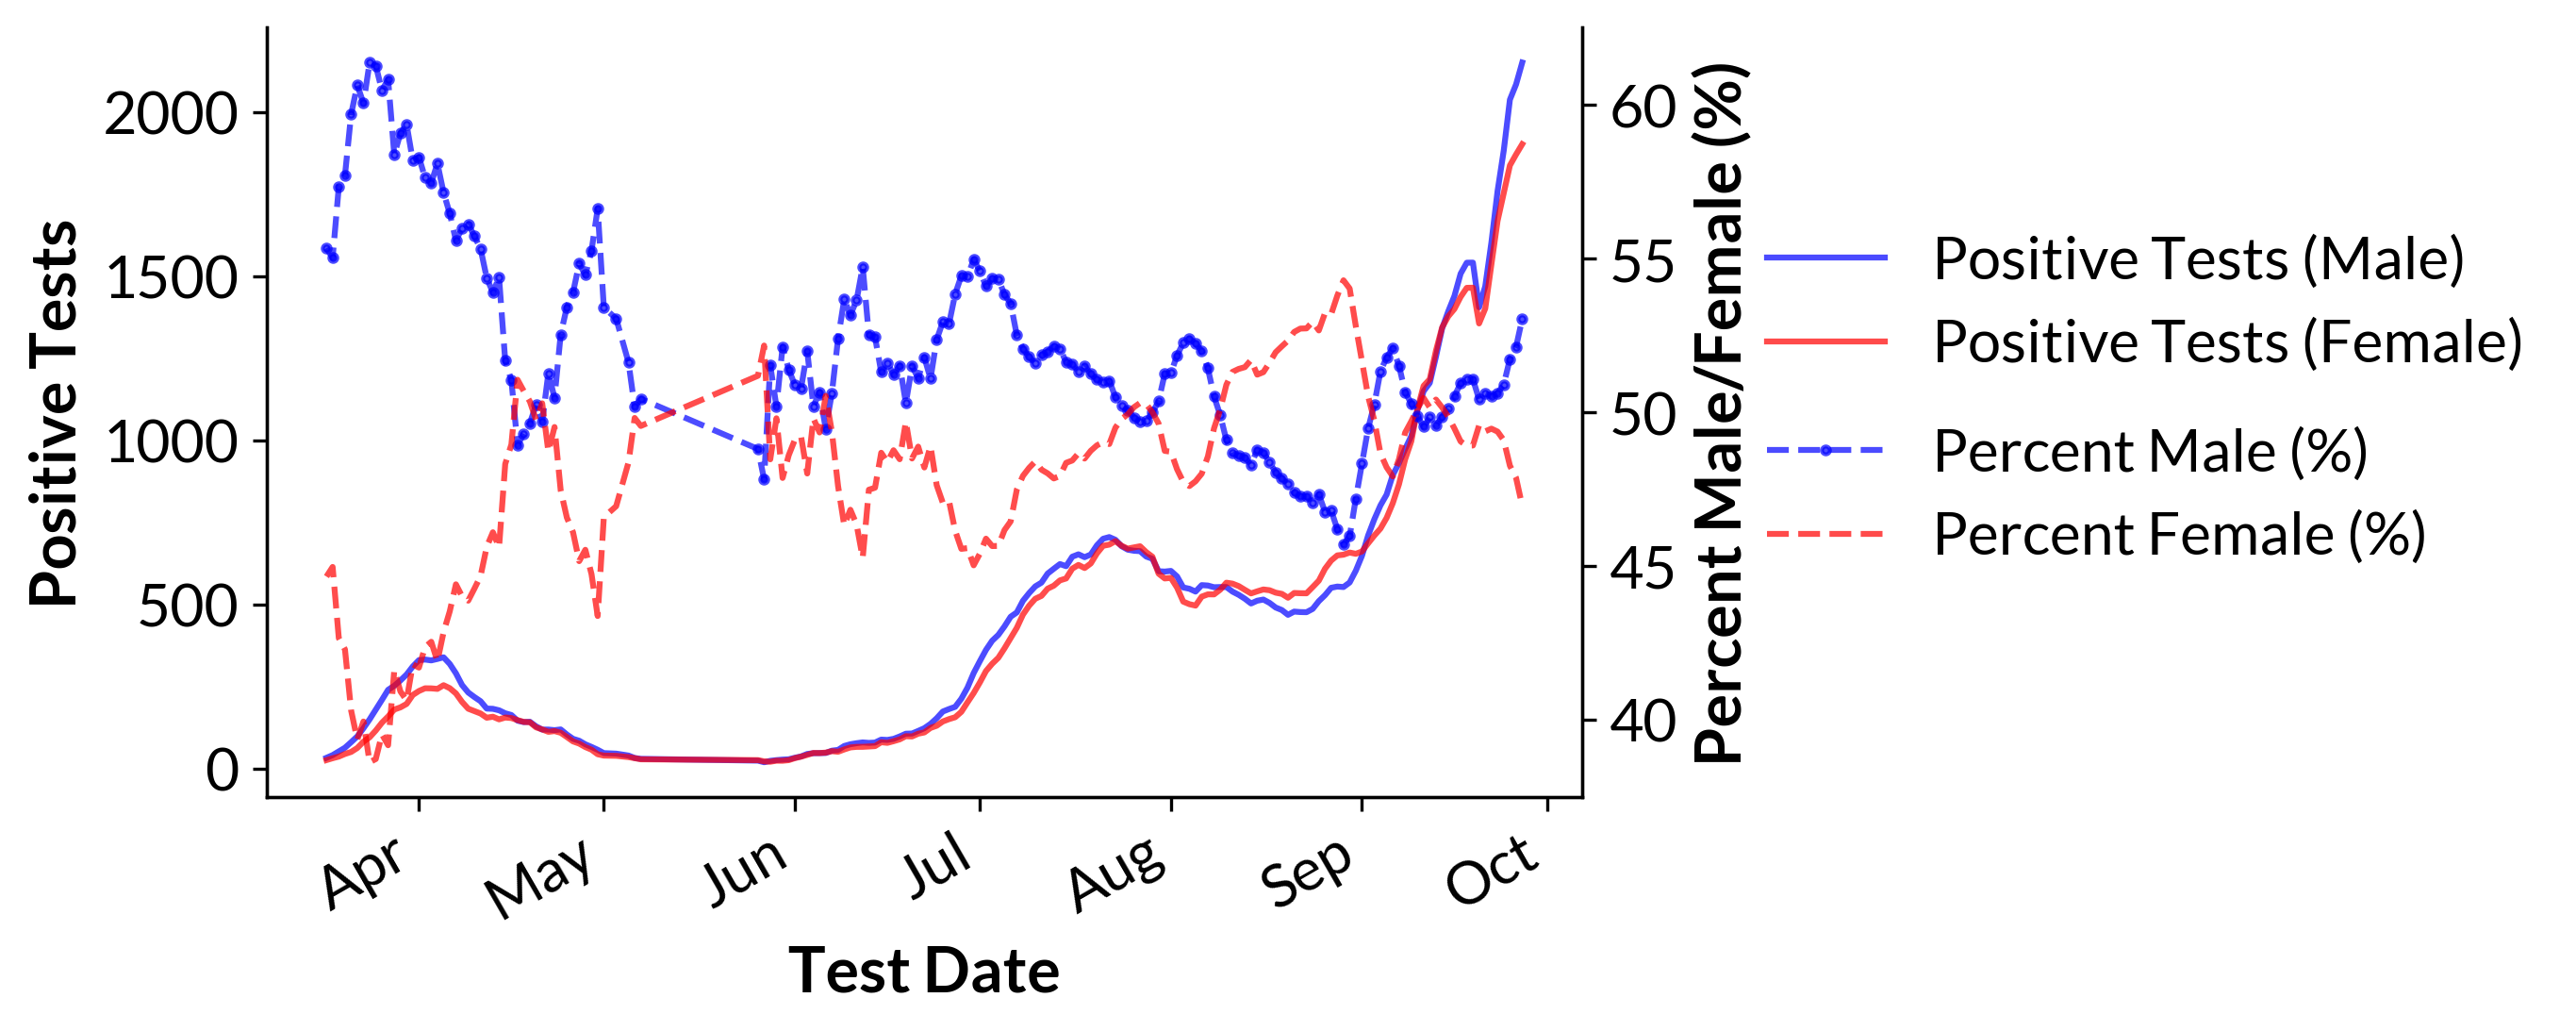

In [149]:
#### male/female
fig, ax = plt.subplots(dpi=300)
df_mf.query("gender == 'זכר'").rolling(7).mean().plot(y='num',label='Positive Tests (Male)',
                                                      color='blue', ax=ax, alpha=.7)
df_mf.query("gender == 'נקבה'").rolling(7).mean().plot(y='num',label='Positive Tests (Female)', ax=ax,
                                                       color='red', alpha=.7)
axt = ax.twinx()
df_mf.query("gender == 'זכר'").rolling(7).mean().plot(y='pct',label='Percent Male (%)', ax=axt, marker='o',ms=2,
                                                      color='blue',linestyle='--', alpha=.7)
df_mf.query("gender == 'נקבה'").rolling(7).mean().plot(y='pct',label='Percent Female (%)', ax=axt, color='red',
                                                       linestyle='--', alpha=.7)
ax.legend(bbox_to_anchor=(1.1,0.8), frameon=False)
axt.legend(bbox_to_anchor=(1.1,0.55), frameon=False)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.set_xlabel('Test Date')
ax.set_ylabel('Positive Tests')
axt.set_ylabel('Percent Male/Female (%)')